<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Resultado de Tarea integradora - Parte 1



In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn
import geopandas as gpd
from IPython.display import display, Markdown, HTML
from pylab import rcParams

In [2]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

#### Cargar el dataset en un dataframe de pandas


In [3]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [4]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [5]:
import six

def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)

# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [6]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---

## Resultados del Ejercicio 1:

<h3>* Imagen mostrando la distribución de los eventos por año:</h3>

In [7]:
# Obtenemos la distribución:
distribucion = dataset.year.value_counts().to_frame().reset_index()
distribucion.columns = ['year', 'count']
distribucion['year'] = pandas.to_numeric(distribucion['year'], downcast='integer')

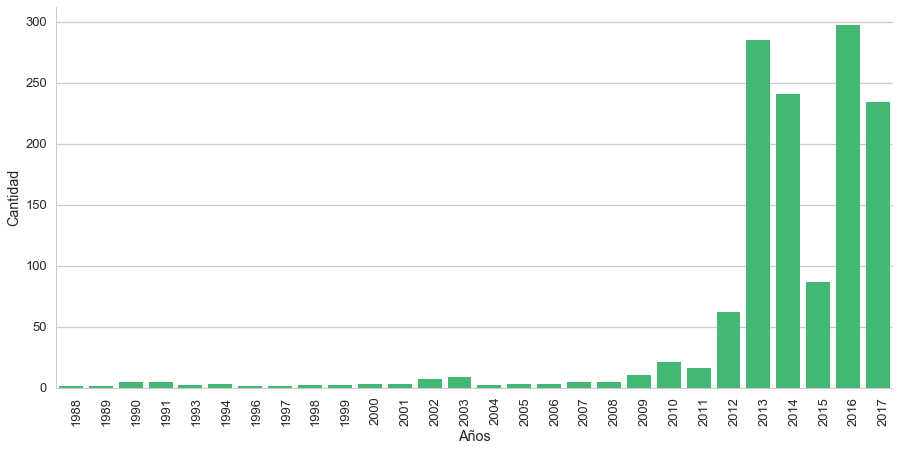

In [8]:
# Mostramos el grafico:
rcParams['figure.figsize'] = 15, 7
ax = seaborn.barplot(data=distribucion, x='year', y='count', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
ax.set(ylabel="Cantidad", xlabel="Años")
seaborn.despine()

---
<h3>* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’:</h3>

In [9]:
# Obtenemos la frecuencia y formateamos los datos para su mejor visualización: 
fdps = dataset.year.value_counts(normalize=True, sort=True).sort_index()
fdps = fdps.to_frame().reset_index()
fdps.columns = ['year', 'probabilidad']
fdps['year'] = pandas.to_numeric(fdps['year'], downcast='integer')

In [10]:
# Presentamos los datos en pantalla:
display(HTML('<h3>Tabla de Frecuencia de Probabilidades por Año:</h3>'))
display(fdps)

,year,probabilidad
0,1988,0.000760
1,1989,0.000760
2,1990,0.003799
3,1991,0.003799
4,1993,0.001520
5,1994,0.002280
6,1996,0.000760
7,1997,0.000760
8,1998,0.001520
9,1999,0.001520


---
<h3>* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.</h3>

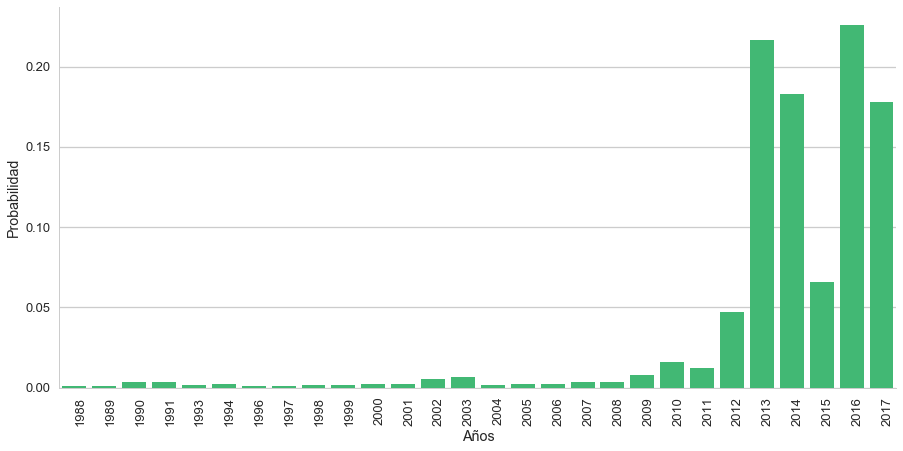

In [11]:
rcParams['figure.figsize'] = 15, 7
ax = seaborn.barplot(data=fdps, x='year', y='probabilidad', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
ax.set(xlabel="Años", ylabel="Probabilidad")
seaborn.despine()

---
<h3>¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?</h3>


 Respuesta: Aunque ambos graficos son similares, los graficos no son iguales por lo que representan. Mientras el primer grafico muestra datos de cantidades de veces en que sucedió (dato), el segundo gráfico refleja la probabilidad de que un caso tomado al azar esté dentro de alguno de los años registrados con mayor indice. Es por esto que, para propósitos estadísticos creo que el segundo grafico es mas útil.

<h3>* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?</h3>

In [12]:
# Tendencia: si el valor > 0 la tendencia se incrementa; valor=0 es constante; valor < 0 se decrementa:
def trendline(data, order=1):
    coeffs = numpy.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]
    return float(slope)

pendiente = trendline(fdps['probabilidad'])
display( HTML('<b>* Tendencia: ' + str(pendiente) + '</b>') )

Respuesta: Si tomamos el gráfico completo, podemos decir que por la forma del gráfico como por la tendencia se indica un aumento en la violencia institucional. El gráfico muestra que existe un marcado crecimiento en los ultimos seis años con respecto al total y un decremento en los ultimos dos. 

---
<H3>Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?</H3>


In [13]:
# Calculo de la distribucion acumulada, en el campo fda:
fdps['fda'] = numpy.cumsum(fdps['probabilidad'].values);
fdps

,year,probabilidad,fda
0,1988,0.000760,0.000760
1,1989,0.000760,0.001520
2,1990,0.003799,0.005319
3,1991,0.003799,0.009119
4,1993,0.001520,0.010638
5,1994,0.002280,0.012918
6,1996,0.000760,0.013678
7,1997,0.000760,0.014438
8,1998,0.001520,0.015957
9,1999,0.001520,0.017477


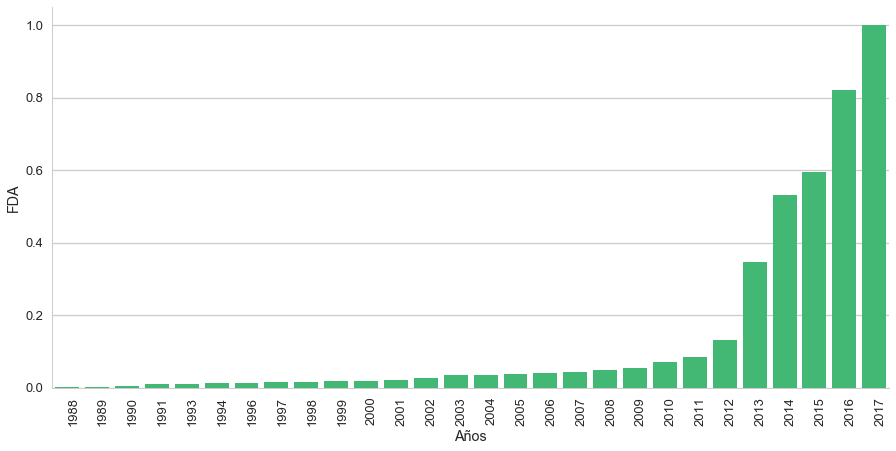

In [14]:
# Grafico de la funcion acumulada:
rcParams['figure.figsize'] = 15, 7
ax = seaborn.barplot(data=fdps, x='year', y='fda', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
ax.set(xlabel='Años', ylabel='FDA')
seaborn.despine()


In [15]:
aniocambiodegobierno = 2015
pavaucg = '{0:.2f}'.format( fdps.loc[fdps['year'] == aniocambiodegobierno].fda.values[0] *100 )
display(HTML('<h3><u>Resultado:</u><br/><br/>La probabilida de que haya dado un acto de violencia antes del ultimo cambio de gobierno (año '+ str(aniocambiodegobierno)+')<br/>es del '+ pavaucg +'%</h3></br></br>'))  

<h3>* IMPORTANTE: ¿Qué hacemos con los datos faltantes?</h3>

Los registros incompletos son descargados (con dropna por ejemplo) ya que no poseen un valor válido; esto se realiza ya que estos valores ensucian la muestra y, por lo tanto, el resultado.

---


## Ejercicio 2

<H2>* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’</H2>


In [16]:
fdps = dataset.provincia.value_counts(normalize=True).sort_index()
fdps = fdps.to_frame().reset_index()
fdps.columns = ['provincia', 'probabilidad']
fdps = fdps.sort_values('probabilidad', ascending=False)
fdps

,provincia,probabilidad
0,Buenos Aires,0.693182
4,Ciudad de Buenos Aires,0.083097
6,Córdoba,0.036932
3,Chubut,0.026278
2,Chaco,0.020597
15,Rio Negro,0.019176
14,Neuquen,0.014915
20,Santa Fe,0.014205
16,Salta,0.012074
12,Mendoza,0.012074


---
<h3>* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?</h3>


Entendemos que una razón importante a considerarse sería contar con el censo poblacional de cada provincia; de esta forma se podría la frecuencia de probabilidad se podría presentar de forma mas equilibrada segun lo que representa para cada una.

---
<h3>* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información</h3>

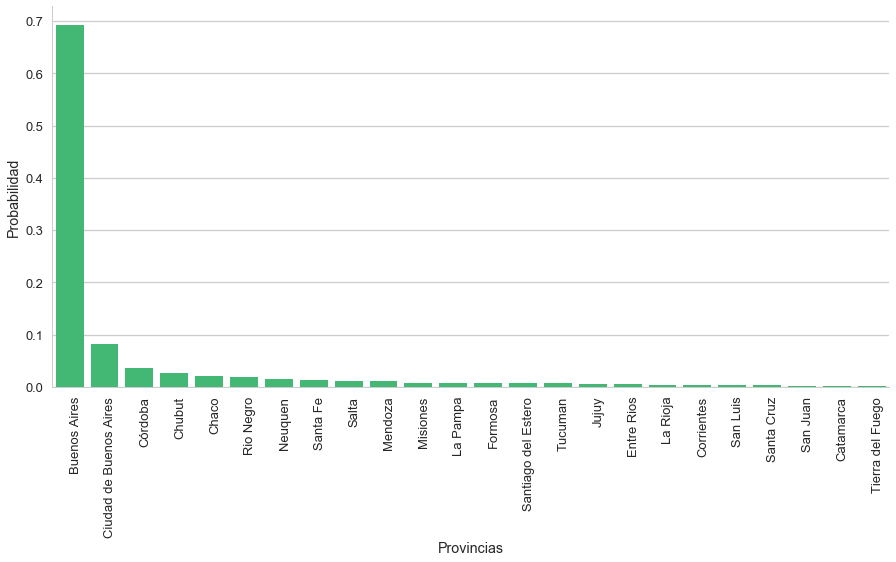

In [17]:
# Grafico de la funcion acumulada:
rcParams['figure.figsize'] = 15, 7
ax = seaborn.barplot(data=fdps, x='provincia', y='probabilidad', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
ax.set(xlabel='Provincias', ylabel='Probabilidad')
seaborn.despine()


---

### Ejercicio 3

<H3>* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?</H3>



In [56]:
# Obtenemos la frecuencia y formateamos los datos para su mejor visualización: 
fdps = dataset[['year', 'provincia']]
fdps = fdps.dropna()
fdps['year'] = pandas.to_numeric(fdps['year'], downcast='integer')
records_count = len(fdps)

# Agrupamos
fdps_grp = fdps.groupby(['provincia', 'year'])['year'].agg(['count'])

# Tranformamos a porcentaje
fdps_grp = fdps_grp.transform(lambda x: (x/records_count))

# Transformamos en tabla
fdps_table = pandas.pivot_table(fdps_grp, index=['provincia'], columns=['year'])
fdps_table = fdps_table.fillna(0)

fdps_table




count                                          \
year                        1988      1989      1990      1991      1993   
provincia                                                                  
Buenos Aires            0.000000  0.000766  0.000000  0.002299  0.000000   
Catamarca               0.000000  0.000000  0.000000  0.000000  0.000000   
Chaco                   0.000000  0.000000  0.003065  0.000000  0.000000   
Chubut                  0.000000  0.000000  0.000000  0.000000  0.000000   
Ciudad de Buenos Aires  0.000766  0.000000  0.000000  0.001533  0.000000   
Corrientes              0.000000  0.000000  0.000000  0.000000  0.000000   
Córdoba                 0.000000  0.000000  0.000000  0.000000  0.000000   
Entre Rios              0.000000  0.000000  0.000000  0.000000  0.000000   
Formosa                 0.000000  0.000000  0.000000  0.000000  0.000000   
Jujuy                   0.000000  0.000000  0.000000  0.000000  0.000000   
La Pampa                0.000000  0.000000  0.000000  0.000000  0.000000   
La Rioja                0.000000  0.000000  0.000000  0.000000  0.000000   
Mendoza                 0.000000  0.000000  0.000766  0.000000  0.000000   
Misiones                0.000000  0.000000  0.000000  0.000000  0.000000   
Neuquen                 0.000000  0.000000  0.000000  0.000000  0.000000   
Rio Negro               0.000000  0.000000  0.000000  0.000000  0.000000   
Salta                   0.000000  0.000000  0.000000  0.000000  0.000000   
San Juan                0.000000  0.000000  0.000000  0.000000  0.000000   
San Luis                0.000000  0.000000  0.000000  0.000000  0.001533   
Santa Cruz              0.000000  0.000000  0.000000  0.000000  0.000000   
Santa Fe                0.000000  0.000000  0.000000  0.000000  0.000000   
Santiago del Estero     0.000000  0.000000  0.000000  0.000000  0.000000   
Tierra del Fuego        0.000000  0.000000  0.000000  0.000000  0.000000   
Tucuman                 0.000000  0.000000  0.000000  0.000000  0.000000   

                                                                          \
year                        1994      1996      1997      1998      1999   
provincia                                                                  
Buenos Aires            0.000766  0.000000  0.000000  0.000000  0.000000   
Catamarca               0.000000  0.000000  0.000000  0.000000  0.000000   
Chaco                   0.000000  0.000000  0.000000  0.000000  0.000000   
Chubut                  0.000000  0.000000  0.000000  0.000000  0.000000   
Ciudad de Buenos Aires  0.000000  0.000766  0.000766  0.000766  0.000000   
Corrientes              0.000000  0.000000  0.000000  0.000000  0.000000   
Córdoba                 0.000000  0.000000  0.000000  0.000000  0.000000   
Entre Rios              0.000000  0.000000  0.000000  0.000000  0.000000   
Formosa                 0.000000  0.000000  0.000000  0.000000  0.000000   
Jujuy                   0.000000  0.000000  0.000000  0.000000  0.000000   
La Pampa                0.000000  0.000000  0.000000  0.000000  0.000000   
La Rioja                0.000000  0.000000  0.000000  0.000000  0.000766   
Mendoza                 0.000000  0.000000  0.000000  0.000000  0.000000   
Misiones                0.000000  0.000000  0.000000  0.000000  0.000000   
Neuquen                 0.000766  0.000000  0.000000  0.000766  0.000000   
Rio Negro               0.000000  0.000000  0.000000  0.000000  0.000000   
Salta                   0.000000  0.000000  0.000000  0.000000  0.000000   
San Juan                0.000000  0.000000  0.000000  0.000000  0.000000   
San Luis                0.000000  0.000000  0.000000  0.000000  0.000000   
Santa Cruz              0.000000  0.000000  0.000000  0.000000  0.000000   
Santa Fe                0.000766  0.000000  0.000000  0.000000  0.000000   
Santiago del Estero     0.000000  0.000000  0.000000  0.000000  0.000000   
Tierra del Fuego        0.000000  0.000000  0.000000  0.000000  0.000000  

---

<H3>* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.</H3>


[Text(0,0.5,'Provincias'), Text(0.5,0,'Años')]

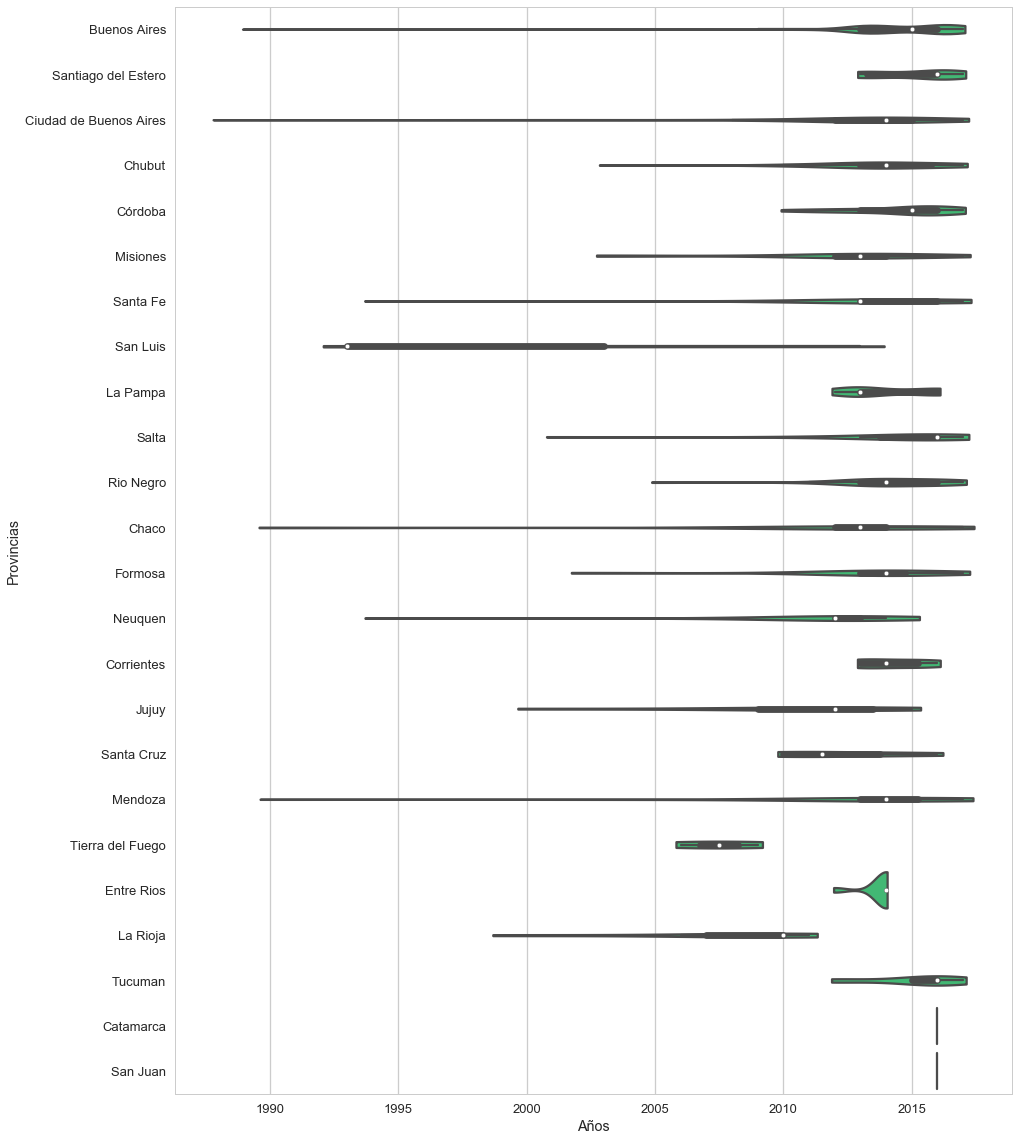

In [48]:
rcParams['figure.figsize'] = 15, 20
ax = seaborn.violinplot(x="year", y="provincia", data=dataset, color='#2ecc71', cut=0.1)
ax.set(xlabel='Años', ylabel='Provincias')

## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

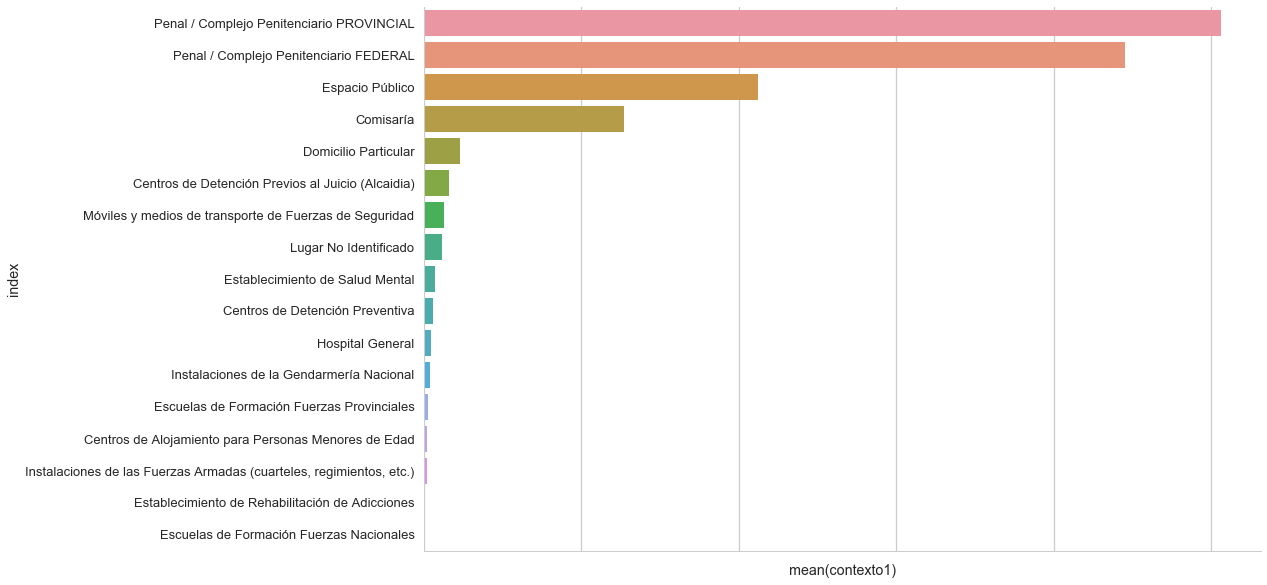

In [22]:
contextos=dataset.contexto1.value_counts()

dataset.get_values()
rcParams['figure.figsize'] = 15, 10
ax = seaborn.barplot(data=contextos.to_frame().reset_index(), x="contexto1", y="index")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
seaborn.despine()

In [23]:
contextos_prob=dataset.contexto1.value_counts(normalize=True)
contextos_prob

Penal / Complejo Penitenciario PROVINCIAL                              0.365343
Penal / Complejo Penitenciario FEDERAL                                 0.321300
Espacio Público                                                        0.153069
Comisaría                                                              0.091697
Domicilio Particular                                                   0.016606
Centros de Detención Previos al Juicio (Alcaidia)                      0.011552
Móviles y medios de transporte de Fuerzas de Seguridad                 0.009386
Lugar No Identificado                                                  0.008664
Establecimiento de Salud Mental                                        0.005054
Centros de Detención Preventiva                                        0.004332
Hospital General                                                       0.003610
Instalaciones de la Gendarmería Nacional                               0.002888
Escuelas de Formación Fuerzas Provincial

Debemos sumar las probabilidades:
fdp(z=penal Prov | penal Fed | z= comisaria | z = Alcaldia | z = FFAA | z = Gendarmeria )

In [24]:
contextos_prob.get("Penal / Complejo Penitenciario PROVINCIAL") + contextos_prob.get("Penal / Complejo Penitenciario FEDERAL") 


0.68664259927797833

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia física’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(N~~|~~M)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?